In [1]:
# Base libraries
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import BASE_COLORS
%matplotlib inline

# sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import math

In [2]:
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv('credit_risk_dataset.csv') 
data

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


In [4]:
data.isnull().sum()/len(data)

person_age                    0.000000
person_income                 0.000000
person_home_ownership         0.000000
person_emp_length             0.027470
loan_intent                   0.000000
loan_grade                    0.000000
loan_amnt                     0.000000
loan_int_rate                 0.095639
loan_status                   0.000000
loan_percent_income           0.000000
cb_person_default_on_file     0.000000
cb_person_cred_hist_length    0.000000
dtype: float64

In [5]:
values = {"person_emp_length" : 0} # Comment
data = data.fillna(value=values)

In [6]:
data.isnull().sum()/len(data)

person_age                    0.000000
person_income                 0.000000
person_home_ownership         0.000000
person_emp_length             0.000000
loan_intent                   0.000000
loan_grade                    0.000000
loan_amnt                     0.000000
loan_int_rate                 0.095639
loan_status                   0.000000
loan_percent_income           0.000000
cb_person_default_on_file     0.000000
cb_person_cred_hist_length    0.000000
dtype: float64

In [7]:
data = data.dropna()

In [8]:
data = data.drop(labels="loan_grade", axis=1) # I decided to remove loan grade because each bank uses a different formula to determine how to give a grade and I couldn't adequately explain the rationale and if they did it right I should have all the information in this dataset
data

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,15000,11.48,0,0.10,N,26


In [9]:
data.shape

(29465, 11)

In [10]:
data.isnull().sum()/len(data)

person_age                    0.0
person_income                 0.0
person_home_ownership         0.0
person_emp_length             0.0
loan_intent                   0.0
loan_amnt                     0.0
loan_int_rate                 0.0
loan_status                   0.0
loan_percent_income           0.0
cb_person_default_on_file     0.0
cb_person_cred_hist_length    0.0
dtype: float64

In [11]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
person_age,29465.0,27.714712,6.300193,20.00,23.00,26.00,30.00,144.00
person_income,29465.0,66020.470490,61901.422932,4000.00,38500.00,55000.00,79100.00,6000000.00
person_emp_length,29465.0,4.654268,4.171572,0.00,2.00,4.00,7.00,123.00
loan_amnt,29465.0,9584.744612,6316.272282,500.00,5000.00,8000.00,12250.00,35000.00
loan_int_rate,29465.0,11.011695,3.240459,5.42,7.90,10.99,13.47,23.22
loan_status,29465.0,0.219379,0.413833,0.00,0.00,0.00,0.00,1.00
loan_percent_income,29465.0,0.170110,0.106879,0.00,0.09,0.15,0.23,0.83
cb_person_cred_hist_length,29465.0,5.788257,4.031987,2.00,3.00,4.00,8.00,30.00


In [12]:
data[data['person_age']==data['person_age'].max()]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
81,144,250000,RENT,4.0,VENTURE,4800,13.57,0,0.02,N,3
183,144,200000,MORTGAGE,4.0,EDUCATION,6000,11.86,0,0.03,N,2
32297,144,6000000,MORTGAGE,12.0,PERSONAL,5000,12.73,0,0.00,N,25


In [13]:
data = data.drop(labels=[81,183,32297], axis=0)

In [14]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
person_age,29462.0,27.702871,6.190264,20.00,23.00,26.00,30.00,123.00
person_income,29462.0,65808.267022,51333.829347,4000.00,38500.00,55000.00,79050.00,2039784.00
person_emp_length,29462.0,4.654063,4.171562,0.00,2.00,4.00,7.00,123.00
loan_amnt,29462.0,9585.184305,6316.441333,500.00,5000.00,8000.00,12250.00,35000.00
loan_int_rate,29462.0,11.011521,3.240571,5.42,7.90,10.99,13.47,23.22
loan_status,29462.0,0.219401,0.413848,0.00,0.00,0.00,0.00,1.00
loan_percent_income,29462.0,0.170126,0.106873,0.00,0.09,0.15,0.23,0.83
cb_person_cred_hist_length,29462.0,5.787828,4.030546,2.00,3.00,4.00,8.00,30.00


In [15]:
data[data['person_age']==data['person_age'].max()]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
575,123,80004,RENT,2.0,EDUCATION,20400,10.25,0,0.25,N,3


In [16]:
data = data.drop(labels=575, axis=0)

In [17]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
person_age,29461.0,27.699637,6.165419,20.00,23.00,26.00,30.00,84.00
person_income,29461.0,65807.785174,51334.633958,4000.00,38500.00,55000.00,79050.00,2039784.00
person_emp_length,29461.0,4.654153,4.171604,0.00,2.00,4.00,7.00,123.00
loan_amnt,29461.0,9584.817216,6316.234252,500.00,5000.00,8000.00,12250.00,35000.00
loan_int_rate,29461.0,11.011547,3.240623,5.42,7.90,10.99,13.47,23.22
loan_status,29461.0,0.219409,0.413853,0.00,0.00,0.00,0.00,1.00
loan_percent_income,29461.0,0.170123,0.106874,0.00,0.09,0.15,0.23,0.83
cb_person_cred_hist_length,29461.0,5.787923,4.030581,2.00,3.00,4.00,8.00,30.00


In [18]:
data[data['person_emp_length']==data['person_emp_length'].max()]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,35000,16.02,1,0.59,Y,3
210,21,192000,MORTGAGE,123.0,VENTURE,20000,6.54,0,0.10,N,4


In [19]:
data = data.drop(labels=[0,210], axis=0)

In [20]:
data.describe().T # if you have negatives use a standardscaler

,count,mean,std,min,25%,50%,75%,max
person_age,29459.0,27.700058,6.165415,20.00,23.00,26.00,30.00,84.00
person_income,29459.0,65803.732611,51331.095711,4000.00,38500.00,55000.00,79050.00,2039784.00
person_emp_length,29459.0,4.646118,4.056168,0.00,2.00,4.00,7.00,41.00
loan_amnt,29459.0,9583.600937,6314.421006,500.00,5000.00,8000.00,12250.00,35000.00
loan_int_rate,29459.0,11.011529,3.240497,5.42,7.90,10.99,13.47,23.22
loan_status,29459.0,0.219390,0.413840,0.00,0.00,0.00,0.00,1.00
loan_percent_income,29459.0,0.170111,0.106849,0.00,0.09,0.15,0.23,0.83
cb_person_cred_hist_length,29459.0,5.788078,4.030672,2.00,3.00,4.00,8.00,30.00


<AxesSubplot:xlabel='loan_status', ylabel='count'>

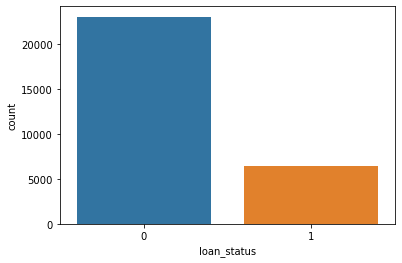

In [21]:
import seaborn as sns # 0 means no default & 1 yes default
sns.countplot(x="loan_status", data=data)

In [22]:
data.to_csv('cleaned_data.csv', index=False)

In [23]:
# send to sql

In [24]:
import pymysql
from sqlalchemy import create_engine

from getpass import getpass

In [25]:
# password = getpass()

········


In [26]:
# connection_string = 'mysql+pymysql://root:' + password + '@localhost/mid_term_project'
# engine = create_engine(connection_string)

# data.to_sql('data', con=engine, index=False)

In [62]:
# sql_pull = pd.read_sql_query('select * from mid_term_project.data', engine)
# sql_pull.head()

In [28]:
numericals = data.select_dtypes(np.number)

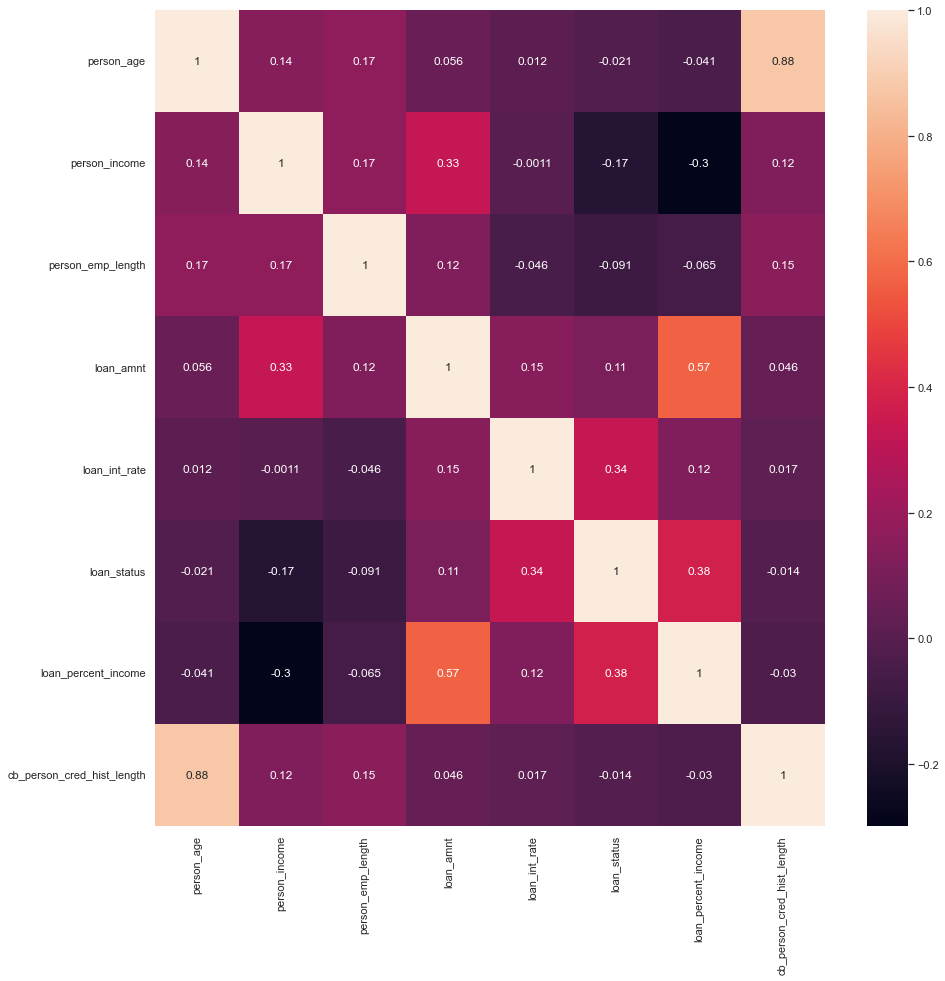

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
person_age,1.000000,0.140438,0.172671,0.055763,0.011966,-0.020948,-0.040710,0.877387
person_income,0.140438,1.000000,0.170194,0.327631,-0.001121,-0.171376,-0.298662,0.121689
person_emp_length,0.172671,0.170194,1.000000,0.118048,-0.046189,-0.090941,-0.064519,0.148360
loan_amnt,0.055763,0.327631,0.118048,1.000000,0.146803,0.106374,0.572482,0.045541
loan_int_rate,0.011966,-0.001121,-0.046189,0.146803,1.000000,0.335092,0.120218,0.016656
loan_status,-0.020948,-0.171376,-0.090941,0.106374,0.335092,1.000000,0.379010,-0.014131
loan_percent_income,-0.040710,-0.298662,-0.064519,0.572482,0.120218,0.379010,1.000000,-0.030329
cb_person_cred_hist_length,0.877387,0.121689,0.148360,0.045541,0.016656,-0.014131,-0.030329,1.000000


In [29]:
correlations_matrix = numericals.corr() 
sns.set(rc = {'figure.figsize':(15,15)})
sns.heatmap(correlations_matrix, annot=True)
plt.show()
correlations_matrix

In [30]:
categoricals = data.select_dtypes(object)

In [31]:
categoricals

,person_home_ownership,loan_intent,cb_person_default_on_file
1,OWN,EDUCATION,N
2,MORTGAGE,MEDICAL,N
3,RENT,MEDICAL,N
4,RENT,MEDICAL,Y
5,OWN,VENTURE,N
...,...,...,...
32576,MORTGAGE,PERSONAL,N
32577,MORTGAGE,PERSONAL,N
32578,RENT,HOMEIMPROVEMENT,N
32579,MORTGAGE,PERSONAL,N


In [32]:
categoricals['person_home_ownership'].unique()

array(['OWN', 'MORTGAGE', 'RENT', 'OTHER'], dtype=object)

In [33]:
categoricals['loan_intent'].unique()

array(['EDUCATION', 'MEDICAL', 'VENTURE', 'PERSONAL', 'HOMEIMPROVEMENT',
       'DEBTCONSOLIDATION'], dtype=object)

In [34]:
categoricals['cb_person_default_on_file'].unique()

array(['N', 'Y'], dtype=object)

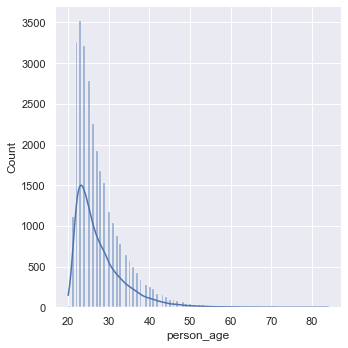

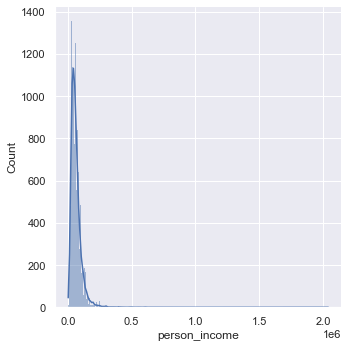

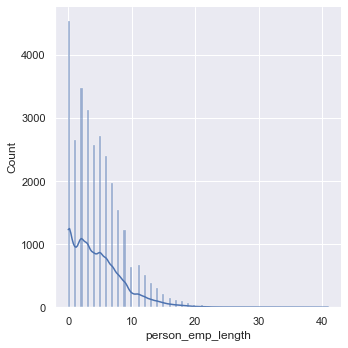

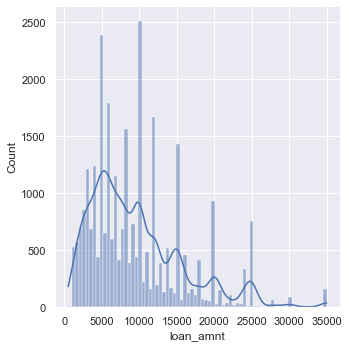

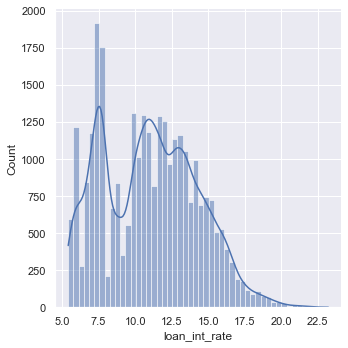

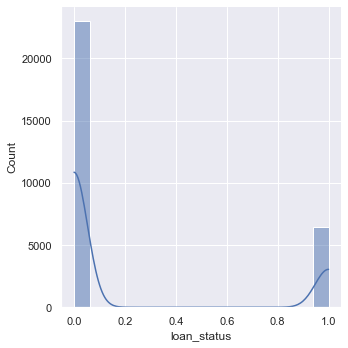

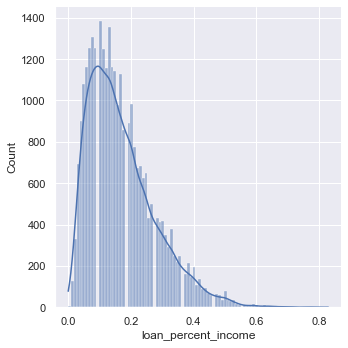

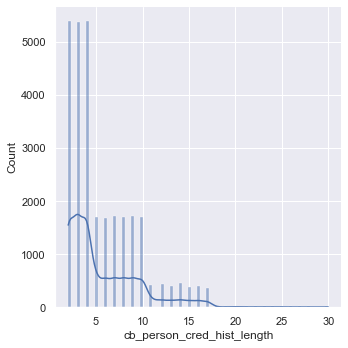

In [35]:
for i, column in enumerate(numericals.columns, 1):
    sns.displot(numericals[column], kde=True)

In [36]:
X = data.drop(['loan_status'],axis=1)
y = data['loan_status']

In [37]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

In [38]:
pd.DataFrame(y_train)

,loan_status
25537,1
24366,0
31627,0
16860,0
23302,0
...,...
13371,1
26973,0
15621,0
25747,0


In [39]:
pd.DataFrame(y_test)

,loan_status
11768,0
2593,0
24663,0
19843,0
27442,0
...,...
13866,0
16991,0
22735,1
12087,0


In [40]:
numericals_train = X_train.select_dtypes(np.number)
numericals_test = X_test.select_dtypes(np.number)


In [41]:
transformer = MinMaxScaler().fit(numericals_train)
x_normalized_train = transformer.transform(numericals_train)
print(x_normalized_train.shape)
x_normalized_train = pd.DataFrame(x_normalized_train, columns=numericals_train.columns)

(23567, 7)


In [42]:
x_normalized_test = transformer.transform(numericals_test)
print(x_normalized_test.shape)
x_normalized_test = pd.DataFrame(x_normalized_test, columns=numericals_test.columns)

(5892, 7)


In [43]:
x_normalized_train.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length
0,0.109375,0.048471,0.268293,0.275362,0.733294,0.168675,0.142857
1,0.109375,0.047301,0.024390,0.275362,0.326495,0.168675,0.250000
2,0.328125,0.077247,0.048780,0.565217,0.538687,0.204819,0.321429
3,0.031250,0.018051,0.000000,0.168116,0.457210,0.253012,0.035714
4,0.156250,0.042426,0.048780,0.217391,0.122509,0.144578,0.107143


In [44]:
x_normalized_test.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length
0,0.09375,0.049776,0.097561,0.275362,0.291325,0.156627,0.000000
1,0.06250,0.022230,0.000000,0.072464,0.498242,0.096386,0.035714
2,0.21875,0.049390,0.341463,0.275362,0.333529,0.156627,0.285714
3,0.15625,0.022230,0.097561,0.130435,0.494138,0.168675,0.107143
4,0.18750,0.094657,0.000000,0.507246,0.043962,0.156627,0.107143


In [45]:
X_train_cat = X_train.select_dtypes(object)
X_test_cat = X_test.select_dtypes(object)

In [46]:
# train
encoder = OneHotEncoder(drop='first').fit(X_train_cat)

cols = encoder.get_feature_names(input_features=X_train_cat.columns)

X_cat_train_encode = pd.DataFrame(encoder.transform(X_train_cat).toarray(),columns=cols)

X_cat_train_encode.head()


,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,cb_person_default_on_file_Y
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


In [47]:
# test

cols = encoder.get_feature_names(input_features=X_test_cat.columns)

X_cat_test_encode = pd.DataFrame(encoder.transform(X_test_cat).toarray(),columns=cols)

X_cat_test_encode.head()

,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,cb_person_default_on_file_Y
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [48]:
X_train = pd.concat([x_normalized_train,X_cat_train_encode],axis=1)
X_test = pd.concat([x_normalized_test,X_cat_test_encode],axis=1)

In [49]:
X_train

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,cb_person_default_on_file_Y
0,0.109375,0.048471,0.268293,0.275362,0.733294,0.168675,0.142857,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.109375,0.047301,0.024390,0.275362,0.326495,0.168675,0.250000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.328125,0.077247,0.048780,0.565217,0.538687,0.204819,0.321429,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.031250,0.018051,0.000000,0.168116,0.457210,0.253012,0.035714,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
4,0.156250,0.042426,0.048780,0.217391,0.122509,0.144578,0.107143,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23562,0.078125,0.051479,0.170732,0.246377,0.372802,0.144578,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
23563,0.171875,0.080729,0.365854,0.202899,0.326495,0.072289,0.250000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
23564,0.093750,0.057747,0.146341,0.420290,0.033411,0.204819,0.000000,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
23565,0.218750,0.059836,0.170732,0.188406,0.021688,0.096386,0.214286,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [50]:
X_test

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,cb_person_default_on_file_Y
0,0.093750,0.049776,0.097561,0.275362,0.291325,0.156627,0.000000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.062500,0.022230,0.000000,0.072464,0.498242,0.096386,0.035714,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0.218750,0.049390,0.341463,0.275362,0.333529,0.156627,0.285714,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.156250,0.022230,0.097561,0.130435,0.494138,0.168675,0.107143,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.187500,0.094657,0.000000,0.507246,0.043962,0.156627,0.107143,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5887,0.062500,0.029751,0.097561,0.391304,0.144197,0.361446,0.071429,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5888,0.046875,0.122514,0.048780,0.130435,0.229191,0.036145,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5889,0.125000,0.043122,0.000000,0.202899,0.343494,0.132530,0.178571,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
5890,0.093750,0.052524,0.024390,0.159420,0.348183,0.096386,0.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


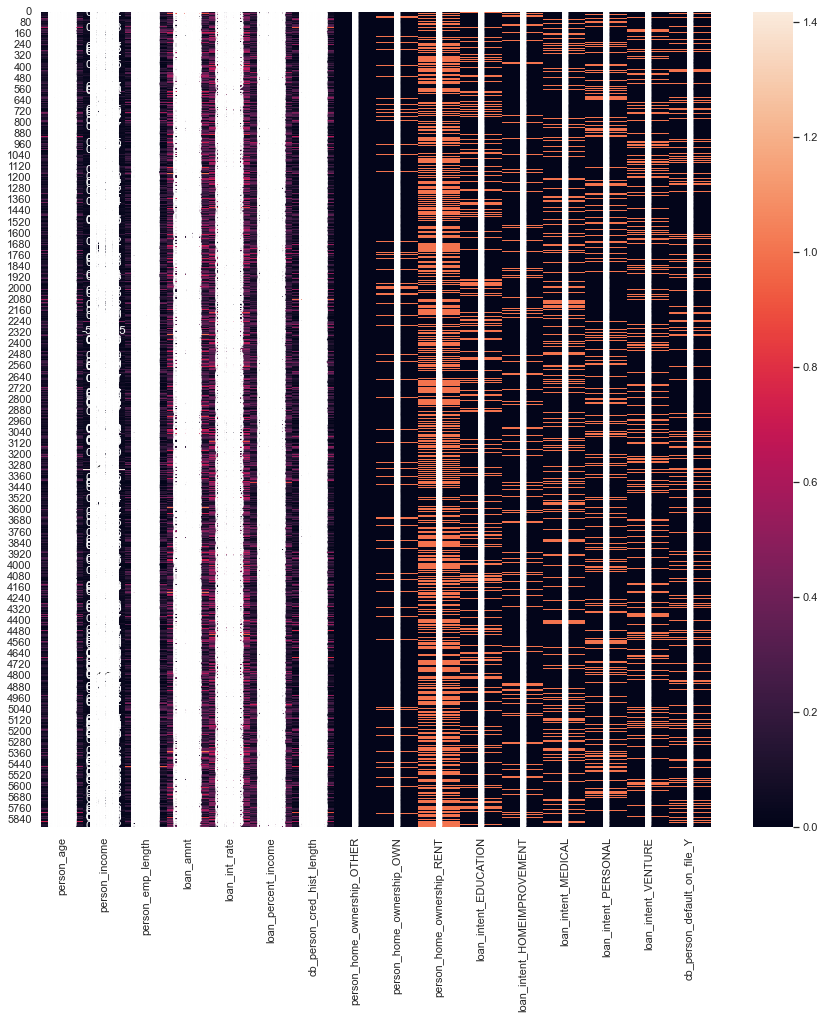

In [64]:
sns.set(rc = {'figure.figsize':(15,15)})
sns.heatmap(X_test, annot=True)
plt.show()

In [51]:
# linear regression

In [52]:

lm = linear_model.LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [53]:
predictions_test = lm.predict(X_test)
r2_score(y_test, predictions_test)

0.2669190799114225

In [54]:
predictions_train = lm.predict(X_train)
r2_score(y_train, predictions_train)

0.30171960846010804

In [55]:
#lalo

#LR = LogisticRegression(random_state=0, solver='lbfgs')
#LR.fit(X_train, y_train)
#round(LR.score(X_test, y_test), 3)


In [56]:
# KNN Neighbors

In [57]:
KNN = KNeighborsRegressor(n_neighbors=3)
KNN.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [58]:
score = KNN.score(X_test, y_test)
score

0.3381015794701624

In [59]:
score_train = KNN.score(X_train, y_train)
score_train

0.6831423586263409

In [60]:
scores = []
for k in range(2,25):
    model = KNeighborsRegressor(n_neighbors=k)
    model.fit(X_train, y_train)
    scores.append(model.score(X_test, y_test))

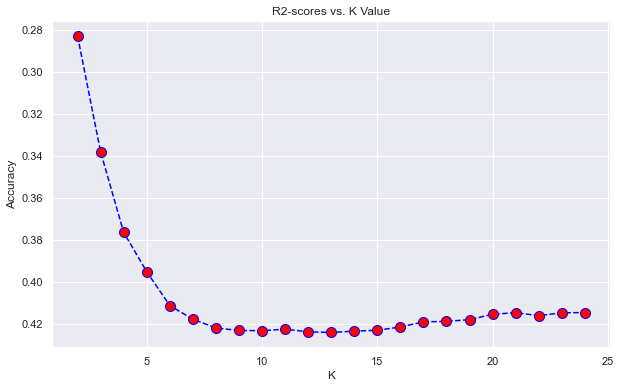

In [61]:
plt.figure(figsize=(10,6))
plt.plot(range(2,25),scores,color = 'blue', linestyle='dashed',
         marker='o', markerfacecolor='red', markersize=10)
plt.title('R2-scores vs. K Value')
plt.gca().invert_yaxis()
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.show()